In [1]:
import pandas as pd
import os
import numpy as np

path = "/Users/wacats_wh/Documents/Workarea/Jupyter Workarea"
os.chdir(path)

In [2]:
freq_df = pd.read_csv('Dataset/Freq-PHO-Binary.csv')
norm_df = pd.read_csv('Dataset/Norm-PHO-Binary.csv')

<AxesSubplot:>

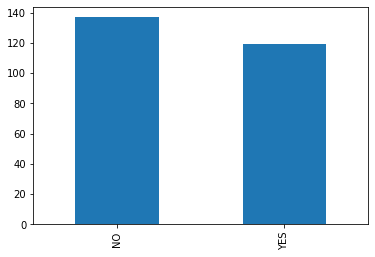

In [3]:
freq_df['Depression'].value_counts().plot(kind = 'bar')

In [4]:
freq_df.groupby('Depression').size()

Depression
NO     137
YES    119
dtype: int64

In [5]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [6]:
# Preprocessing One-Hot-Encoding on Gender and binarizing Depression
le = preprocessing.LabelEncoder()

freq_df = pd.get_dummies(freq_df, columns = ['Gender'])
freq_df.drop(freq_df.filter(regex = "Unname"),axis = 1, inplace = True)
freq_df['Depression'] = le.fit_transform(freq_df['Depression'])

norm_df = pd.get_dummies(norm_df, columns = ['Gender'])
norm_df.drop(norm_df.filter(regex = "Unname"), axis = 1, inplace = True)
norm_df['Depression'] = le.fit_transform(norm_df['Depression'])

In [7]:
freq_X = freq_df.drop(columns = 'Depression') # Training
freq_y = freq_df[['Depression']] # Target

norm_X = norm_df.drop(columns = 'Depression') # Training
norm_y = norm_df[['Depression']] # Target

In [8]:
dummy = DummyClassifier(strategy = 'uniform', random_state = 8)
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 8)

In [9]:
# Freq_df on dummy classifier as baseline
freq_dummy_scores = cross_val_score(dummy, freq_X, freq_y, scoring = 'accuracy', cv = cv)
print("Freq_df dummy accuracy: ", np.mean(freq_dummy_scores))

Freq_df dummy accuracy:  0.4497737556561086


In [10]:
# Norm_df on dummy classifier as baseline
norm_dummy_scores = cross_val_score(dummy, norm_X, norm_y, scoring = 'accuracy', cv = cv)
print("Norm_df dummy accuracy: ", np.mean(norm_dummy_scores))

Norm_df dummy accuracy:  0.4497737556561086


In [11]:
# Default Decision Tree
decision_tree = DecisionTreeClassifier(random_state = 8)

In [12]:
# Freq_df on default Decision Tree classifier
freq_decision_tree_scores = cross_val_score(decision_tree, freq_X, freq_y, scoring = 'accuracy', cv = cv)
print("Freq_df default decision tree accuracy: ", np.mean(freq_decision_tree_scores))

Freq_df default decision tree accuracy:  0.5232277526395174


In [13]:
# Norm_df on default Decision Tree classifier
norm_decision_tree_scores = cross_val_score(decision_tree, norm_X, norm_y, scoring = 'accuracy', cv = cv)
print("Norm_df default decision tree accuracy: ", np.mean(norm_decision_tree_scores))

Norm_df default decision tree accuracy:  0.5115384615384615


In [14]:
# DecisionTree GridSearchCV
dt_param_grid = {
    'criterion': ["gini", "entropy"],
    'max_depth': [5, 10, 15, 20],
    'max_features': [1, 3, 5],
    'random_state': [8]
}

dt_grid = GridSearchCV(DecisionTreeClassifier(), dt_param_grid, refit = True)

In [15]:
# Best Decision Tree params for freq
dt_grid.fit(freq_X, freq_y)
print("Freq_df Decision Tree Best Params: ", dt_grid.best_params_)

Freq_df Decision Tree Best Params:  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 5, 'random_state': 8}


In [16]:
# Tuned freq_df Decision Tree score
freq_dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, max_features = 5, random_state = 8)
freq_dt_tuned_scores = cross_val_score(freq_dt, freq_X, np.ravel(freq_y), scoring = 'accuracy', cv = cv)
print("Freq_df tuned Decision Tree accuracy: ", np.mean(freq_dt_tuned_scores))

Freq_df tuned Decision Tree accuracy:  0.5119909502262443


In [17]:
# Best Decision Tree params for norm
dt_grid.fit(norm_X, norm_y)
print("Norm_df Decision Tree Best Params: ", dt_grid.best_params_)

Norm_df Decision Tree Best Params:  {'criterion': 'entropy', 'max_depth': 20, 'max_features': 5, 'random_state': 8}


In [18]:
# Tuned norm_df Decision Tree score
norm_dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 20, max_features = 5, random_state = 8)
norm_dt_tuned_scores = cross_val_score(norm_dt, norm_X, np.ravel(norm_y), scoring = 'accuracy', cv = cv)
print("Norm_df tuned Decision Tree accuracy: ", np.mean(norm_dt_tuned_scores))

Norm_df tuned Decision Tree accuracy:  0.5739819004524886


In [19]:
# Default SVC
svc = SVC(random_state = 8)

In [20]:
# Freq_df on default SVM classifier
freq_svc_scores = cross_val_score(svc, freq_X, np.ravel(freq_y), scoring = 'accuracy', cv = cv)
print("Freq_df default SVC accuracy: ", np.mean(freq_svc_scores))

Freq_df default SVC accuracy:  0.5897435897435898


In [21]:
# Norm_df on default SVM classifier
norm_svc_scores = cross_val_score(svc, norm_X, np.ravel(norm_y), scoring = 'accuracy', cv = cv)
print("Norm_df default SVC accuracy: ", np.mean(norm_svc_scores))

Norm_df default SVC accuracy:  0.6248868778280543


In [22]:
# SVC GridSearchCV
svc_param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.001, 0.0001],
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'random_state': [8]
}

svc_grid = GridSearchCV(SVC(), svc_param_grid, refit = True)

In [23]:
# Best SVC params for freq
svc_grid.fit(freq_X, np.ravel(freq_y))
print("Freq_df SVC Best Params: ", svc_grid.best_params_)

Freq_df SVC Best Params:  {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf', 'random_state': 8}


In [24]:
# Tuned freq SVC score
freq_SVC = SVC(C = 10, gamma = 0.0001, kernel = 'rbf', random_state = 8)
freq_svc_tuned_scores = cross_val_score(freq_SVC, freq_X, np.ravel(freq_y), scoring = 'accuracy', cv = cv)
print("Freq_df tuned SVC accuracy: ", np.mean(freq_svc_tuned_scores))

Freq_df tuned SVC accuracy:  0.6131221719457014


In [25]:
# Best SVC params for norm
svc_grid.fit(norm_X, np.ravel(norm_y))
print("Norm_df SVC Best Params: ", svc_grid.best_params_)

Norm_df SVC Best Params:  {'C': 100, 'gamma': 0.001, 'kernel': 'sigmoid', 'random_state': 8}


In [26]:
# Tuned norm SVC score
norm_SVC = SVC(C = 100, gamma = 0.001, kernel = 'sigmoid', random_state = 8)
norm_svc_tuned_scores = cross_val_score(norm_SVC, norm_X, np.ravel(norm_y), scoring = 'accuracy', cv = cv)
print("Norm_df tuned SVC accuracy: ", np.mean(norm_svc_tuned_scores))

Norm_df tuned SVC accuracy:  0.6208898944193062


In [27]:
# Default KNN
knn = KNeighborsClassifier()

In [28]:
# Freq_df on default KNN classifier
freq_knn_scores = cross_val_score(knn, freq_X, np.ravel(freq_y), scoring = 'accuracy', cv = cv)
print("Freq_df default KNN accuracy: ", np.mean(freq_knn_scores))

Freq_df default KNN accuracy:  0.5076923076923077


In [29]:
# Norm_df on default KNN classifier
norm_knn_scores = cross_val_score(knn, norm_X, np.ravel(norm_y), scoring = 'accuracy', cv = cv)
print("Norm_df default KNN accuracy: ", np.mean(norm_knn_scores))

Norm_df default KNN accuracy:  0.5780542986425339


In [30]:
# KNN GridSearchCV
knn_param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2] # 1 - Manhattan, 2 - Euclidean
}

knn_grid = GridSearchCV(KNeighborsClassifier(), knn_param_grid, refit = True)

In [31]:
# Best KNN params for freq
knn_grid.fit(freq_X, np.ravel(freq_y))
print("Freq_df KNN Best Params: ", knn_grid.best_params_)

Freq_df KNN Best Params:  {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}


In [32]:
# Tuned freq KNN score
freq_KNN = KNeighborsClassifier(n_neighbors = 7, p = 1, weights = 'distance')
freq_knn_tuned_scores = cross_val_score(freq_KNN, freq_X, np.ravel(freq_y), scoring = 'accuracy', cv = cv)
print("Freq_df tuned KNN accuracy: ", np.mean(freq_knn_tuned_scores))

Freq_df tuned KNN accuracy:  0.5115384615384616


In [33]:
# Best KNN params for freq
knn_grid.fit(norm_X, np.ravel(norm_y))
print("Norm_df KNN Best Params: ", knn_grid.best_params_)

Norm_df KNN Best Params:  {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}


In [34]:
# Tuned norm KNN score
norm_KNN = KNeighborsClassifier(n_neighbors = 9, p = 1, weights = 'distance')
norm_knn_tuned_scores = cross_val_score(norm_KNN, norm_X, np.ravel(norm_y), scoring = 'accuracy', cv = cv)
print("Norm_df tuned KNN accuracy: ", np.mean(norm_knn_tuned_scores))

Norm_df tuned KNN accuracy:  0.6011312217194571


In [35]:
import pickle

freq_filename = 'freq_model.sav'
norm_filename = 'norm_model.sav'

pickle.dump(freq_SVC, open(freq_filename, 'wb')) # Tuned SVM Classifier
pickle.dump(svc, open(norm_filename, 'wb')) # Default SVM Classifier...